# 1. Data

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## Activity: Data Preparation and Analysis for Neural Networks

This activity is designed to test your skills in generating synthetic datasets, handling real-world data challenges, and preparing data to be fed into neural networks.

### Exercise 1
Exploring Class Separability in 2D
Understanding how data is distributed is the first step before designing a network architecture. In this exercise, you will generate and visualize a two-dimensional dataset to explore how data distribution affects the complexity of the decision boundaries a neural network would need to learn.

**Generate the Data**: Create a synthetic dataset with a total of 400 samples, divided equally among 4 classes (100 samples each). Use a Gaussian distribution to generate the points for each class

In [18]:
np.random.seed(42)  # Essa função usa sementes que sempre irão gerar a mesma sequencia randomica.

# Médias e desvios para cada classe
means = [(2, 3), (5, 6), (8, 1), (15, 4)]
stds = [(0.8, 2.5), (1.2, 1.9), (0.9, 0.9), (0.5, 2)]

data = []
labels = []

for i in range(len(means)):
    mean = means[i]
    std = stds[i]

    x = np.random.normal(loc=mean[0], scale=std[0], size=100)
    y = np.random.normal(loc=mean[1], scale=std[1], size=100)

    points = []
    for j in range(100):
        points.append([x[j], y[j]])

    data.extend(points)

    for j in range(100):
        labels.append(i)

data = np.array(data)
labels = np.array(labels)

**Plot the Data**: Create a 2D scatter plot showing all the data points. Use a different color for each class to make them distinguishable.


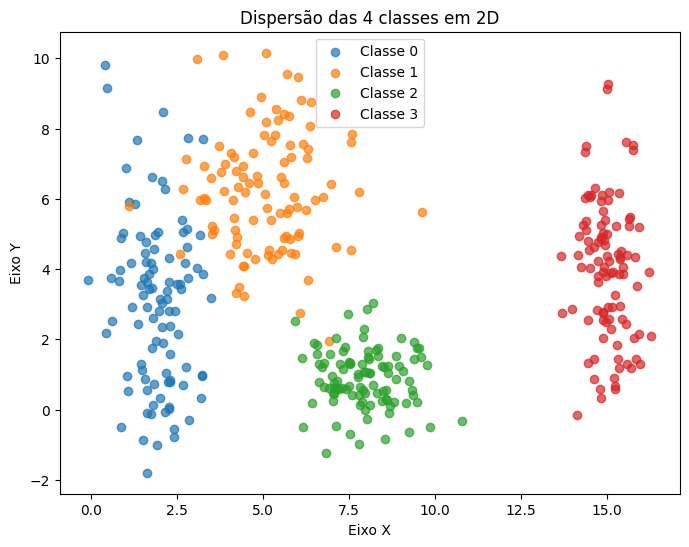

In [19]:
plt.figure(figsize=(8, 6))
for cls in range(4):
    plt.scatter(data[labels == cls, 0],
                data[labels == cls, 1],
                label=f'Classe {cls}',
                alpha=0.7)
plt.legend()
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Dispersão das 4 classes em 2D')
plt.show()

**Analyze and Draw Boundaries**:
1. Examine the scatter plot carefully. Describe the distribution and overlap of the four classes.
2. Based on your visual inspection, could a simple, linear boundary separate all classes?
3. On your plot, sketch the decision boundaries that you think a trained neural network might learn to separate these classes.

**Answers**
1. O scatter plot mostra que as quatro classes estão distribuidas de forma relativamente clara, com alguma sobreposição entre elas. As classes 0 e 1 estão mais próximas uma da outra, enquanto as classes 2 ainda encosta um pouco na classe 1, e longe de todas as outras temos a classe 3.
2. Não, uma fronteira linear simples não seria capaz de separar todas as classes de forma eficaz, especialmente devido à sobreposição entre as classes 0 e 1.
3. Pode ser visto no gráfico abaixo:

![Exemplo de gráfico](data_ex1_3_graph.png)

### Exercise 2
Non-Linearity in Higher Dimensions
Simple neural networks (like a Perceptron) can only learn linear boundaries. Deep networks excel when data is not linearly separable. This exercise challenges you to create and visualize such a dataset.

**Generate the Data**: Create a dataset with 500 samples for Class A and 500 samples for Class B.

In [20]:
mu_A = [0, 0, 0, 0, 0]
Sigma_A = np.array([[1.0, 0.8, 0.1, 0.0, 0.0],
                    [0.8, 1.0, 0.3, 0.0, 0.0],
                    [0.1, 0.3, 1.0, 0.5, 0.0],
                    [0.0, 0.0, 0.5, 1.0, 0.2],
                    [0.0, 0.0, 0.0, 0.2, 1.0]])

mu_B = [1.5, 1.5, 1.5, 1.5, 1.5]
Sigma_B = np.array([[1.5, -0.7,  0.2, 0.0, 0.0],
                    [-0.7, 1.5,  0.4, 0.0, 0.0],
                    [0.2,  0.4,  1.5, 0.6, 0.0],
                    [0.0,  0.0,  0.6, 1.5, 0.3],
                    [0.0,  0.0,  0.0, 0.3, 1.5]])

XA = np.random.multivariate_normal(mu_A, Sigma_A, size=500)
XB = np.random.multivariate_normal(mu_B, Sigma_B, size=500)

X = np.vstack([XA, XB])
y = np.array([0]*500 + [1]*500)

**Visualize the Data**: Since you cannot directly plot a 5D graph, you must reduce its dimensionality.

**PCA**:
1. Centralizar os dados (tirar a média).
2. Calcular a matriz de covariância.
3. Extrair autovalores e autovetores da matriz de covariância.
4. Ordenar autovetores pelos maiores autovalores.
5. Projetar os dados nos autovetores escolhidos.

In [21]:
def my_pca(X, n_components=None):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    autovalores, autovetores = np.linalg.eigh(cov_matrix)

    sorted_idx = np.argsort(autovalores)[::-1]
    autovalores = autovalores[sorted_idx]
    autovetores = autovetores[:, sorted_idx]

    total_var = np.sum(autovalores)

    if n_components is not None:
        autovetores = autovetores[:, :n_components]
        autovalores = autovalores[:n_components]

    X_pca = np.dot(X_centered, autovetores)

    return X_pca, autovetores, autovalores, total_var

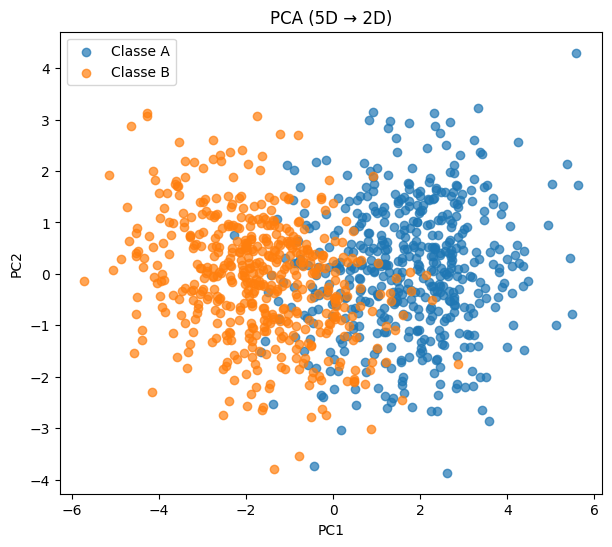

Variância explicada: [0.52303265 0.15751841]
Variância Acumulada: 0.6805510605944183


In [23]:
Z, autovetores, autovalores, total_var = my_pca(X, n_components=2)

plt.figure(figsize=(7,6))
plt.scatter(Z[y==0,0], Z[y==0,1], alpha=0.7, label='Classe A')
plt.scatter(Z[y==1,0], Z[y==1,1], alpha=0.7, label='Classe B')
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA (5D → 2D)')
plt.legend(); plt.show()

print('Variância explicada:', autovalores / total_var)
print('Variância Acumulada:', np.sum(autovalores / total_var))

**Analyze the Plots**:
1. Based on your 2D projection, describe the relationship between the two classes.
2. Discuss the **linear separability** of the data. Explain why this type of data structure poses a challenge for simple linear models and would likely require a multi-layer neural network with non-linear activation functions to be classified accurately.

**Answers**
1. As duas classes estão bem próximas uma da outra, com uma quantidade significativa de sobreposição. Caso não fossem duas classes diferentes, poderíamos considerar que se tratam de uma única classe.
2. Não é possivel traçar uma linha que separa as duas classes de forma eficaz, sempre haverá uma área de sobreposição. Modelos lineares simples, como um Perceptron ou Regressão Logística, vão ter dificuldade porque só conseguem aprender fronteiras lineares (hiperplanos). Eles errariam bastante nos pontos da região central de overlap.
